<a href="https://colab.research.google.com/github/Papachuil/James-Pandas/blob/main/Unsupervised_Machine_Learning_James1_Assignment_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
X_train = np.loadtxt("/content/X_test.txt")
y_train = np.loadtxt("/content/y_train.txt").astype(int)

X_test = np.loadtxt("/content/X_test.txt")
y_test = np.loadtxt("/content/y_test.txt").astype(int)

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Write a function to merge training and testing numpy arrays together as we are going to do unsupervised learning and we don't need separate data

In [6]:
# Solution
def merged_training_test(X_train,y_train,X_test,y_test):
  #merged the x features arrays
  x_merged = np.concatenate((X_train,X_test), axis=0)

    #merged the y label arrays
  y_merged = np.concatenate((y_train, y_test), axis=0)

  return x_merged, y_merged


In [7]:
#Now Merged the datasets
x_merged, y_merged = merged_training_test(X_train,y_train,X_test,y_test)

In [8]:
#print the shapes to verify
print("X- merged: ", x_merged.shape)
print("Y - Merged: ", y_merged )

X- merged:  (5894, 561)
Y - Merged:  [5 5 5 ... 2 2 2]


2. Write a code to transform the data using PCA  to cover the 80% of the variance of the original (scaled) data?

In [9]:
# Solution: scalling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_merged)

#Apply PCA to cover 80% of the variance of the original scaled data.
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(X_scaled)

In [10]:
#print shapes to verify the transformation results:
print("Original merged feature array shape:", x_merged.shape)
print("PCA transformed feature array shape:", X_pca.shape)

Original merged feature array shape: (5894, 561)
PCA transformed feature array shape: (5894, 26)


In [11]:
# Verify the amount of variance explained by the components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the PCA components: {explained_variance * 100:.2f}%")

Variance explained by the PCA components: 80.08%


3. How many principal components cover 80% of the variance in data?

In [12]:
# Solution
#First calculate the cumplative variance first, then find the number of components that cover 80% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#components that cover 80%
num_components_80_percent_variance = np.argmax(cumulative_variance>=0.80) + 1

In [13]:
#print to see the results for TESTING
print(f"Number of principal components that cover 80% of the variance: {num_components_80_percent_variance}")

Number of principal components that cover 80% of the variance: 26


4. What percentage of the variance is covered by the top 3 principal components?

In [14]:
# Solution
explained_variance_top_3 = np.sum(pca.explained_variance_ratio_[:3]) * 100

In [15]:
#print the top 3 principal components:
print(f"Percentage of variance covered by the top 3 principal components: {explained_variance_top_3:.2f}%")

Percentage of variance covered by the top 3 principal components: 59.40%


5. Write a code to visualize data on a 2-D plot

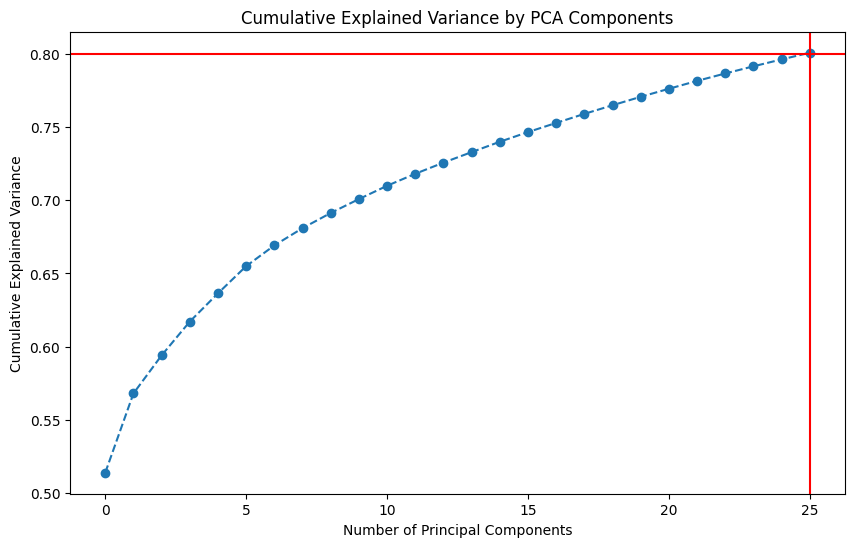

In [16]:
# Solution
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.axvline(x=num_components_80_percent_variance - 1, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.show()

6. Perform k-means clustering and plot SSE to find out the optimal number of clusters

In [17]:
# Solution
# fit the pca transformers first then calculate the K - means clusters
X_reduced = pca.fit_transform(X_scaled)
sse = []
k_range = range(1, 7)  # Trying from 1 to 6 clusters

Remember that each label in y represents
* 1 - WALKING
* 2 - WALKING_UPSTAIRS
* 3 - WALKING_DOWNSTAIRS
* 4 - SITTING
* 5 - STANDING
* 6 - LAYING

7. Calculate the SSE for 6 clusters using k-means

In [18]:
# Solution:

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    sse.append(kmeans.inertia_)

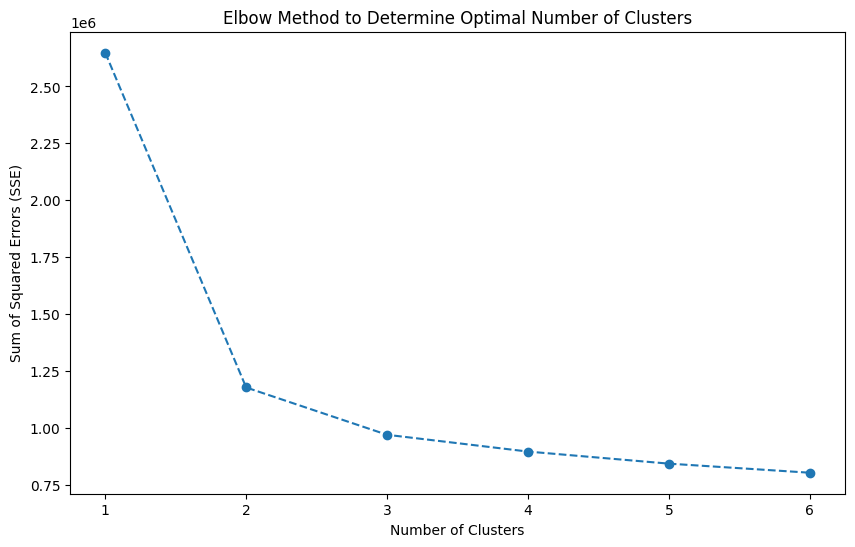

In [19]:
#Plot the SSE agains the number of 6 clusters:
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

8. Compare the Silhouette score of k-means and Agglomerative clustering

In [25]:
# Solution
# Let's assume the "elbow" is at k = 3 or 2 for this example
optimal_k = 2

In [26]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced)

In [27]:
# Compute the Silhouette score for K-means
kmeans_silhouette_score = silhouette_score(X_reduced, kmeans_labels)
print(f'Silhouette Score for K-means: {kmeans_silhouette_score:.4f}')

Silhouette Score for K-means: 0.4886


In [28]:
# Perform Agglomerative clustering with the same number of clusters
agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels = agglo.fit_predict(X_reduced)

In [29]:
# Compute the Silhouette score for Agglomerative clustering
agglo_silhouette_score = silhouette_score(X_reduced, agglo_labels)
print(f'Silhouette Score for Agglomerative Clustering: {agglo_silhouette_score:.4f}')

Silhouette Score for Agglomerative Clustering: 0.4884


9. Perform DBSCAN clustering with <i>epsilon</i>=10 and <i>min_samples</i>=5

In [30]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_reduced)

10. Compare the silhoutte score of DBSCAN with earlier clustering methods.

In [31]:
# Compute the Silhouette score for DBSCAN
# Note: Silhouette score is not defined for clusters with only one cluster or for noise points
# In such cases, we handle it by checking the number of unique labels
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette_score = silhouette_score(X_reduced, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette_score:.4f}')
else:
    print('Silhouette Score for DBSCAN cannot be computed due to insufficient clusters or too many noise points.')

Silhouette Score for DBSCAN: 0.1448


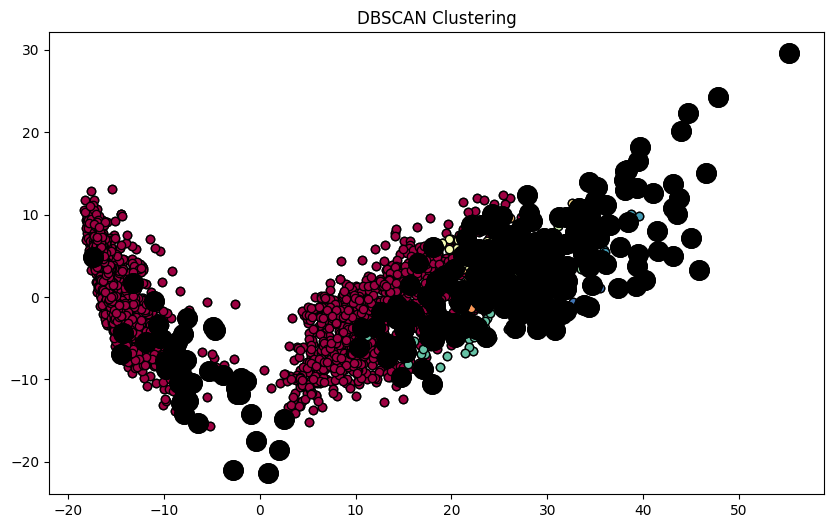

In [32]:
# Now lets plot the clusters for the DBSCAN
plt.figure(figsize=(10, 6))
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    xy = X_reduced[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14 if k == -1 else 6)

plt.title('DBSCAN Clustering')
plt.show()